In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pickle
from scipy.stats import norm
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
  
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
        	# Write code here
            r[i] = r[i]/np.sum(r,axis=1)[i] 
            pass
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) 
                
            """calculate pi_c"""
            # write code here
            pi_c = []
            for m in m_c:
                pi_c.append(m/np.sum(m_c))
            """calculate mu_c"""
            # write code here
#             self.mu = 
            mu_c = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """calculate var_c"""
            var_c = []
            #write code here

            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(len(self.X),1))*
                    (self.X.reshape(len(self.X),1)-mu_c[c])).T,(self.X.reshape(len(self.X),1)-mu_c[c])))

            plt.show()



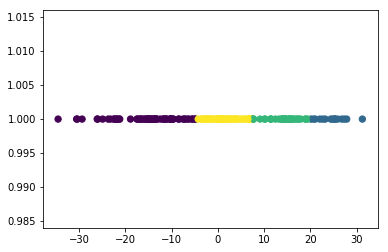

[[ 0.098  0.     0.003  0.899]
 [ 1.     0.     0.     0.   ]
 [ 0.     0.095  0.905  0.   ]
 [ 0.053  0.     0.014  0.933]
 [ 0.     0.069  0.93   0.   ]]


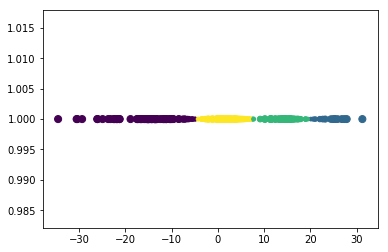

-4.02531620482
8


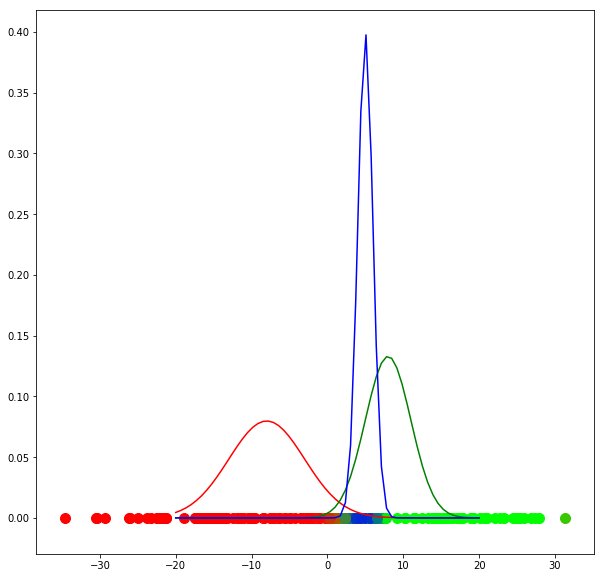

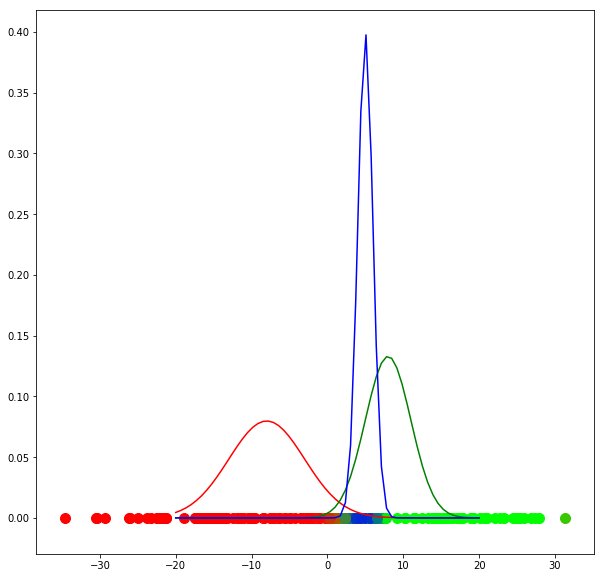

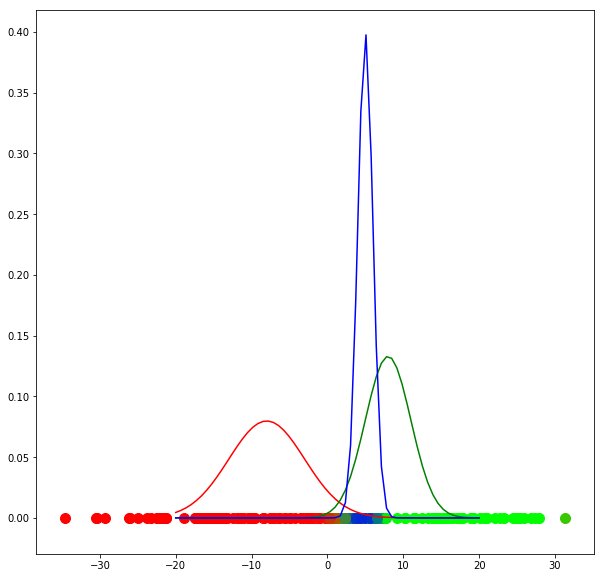

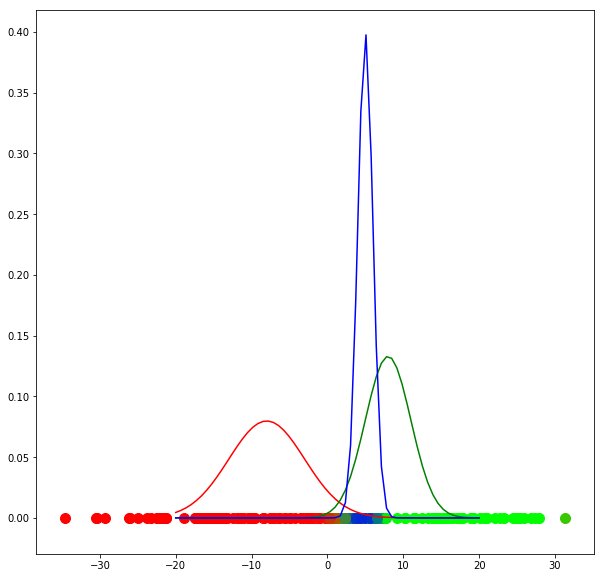

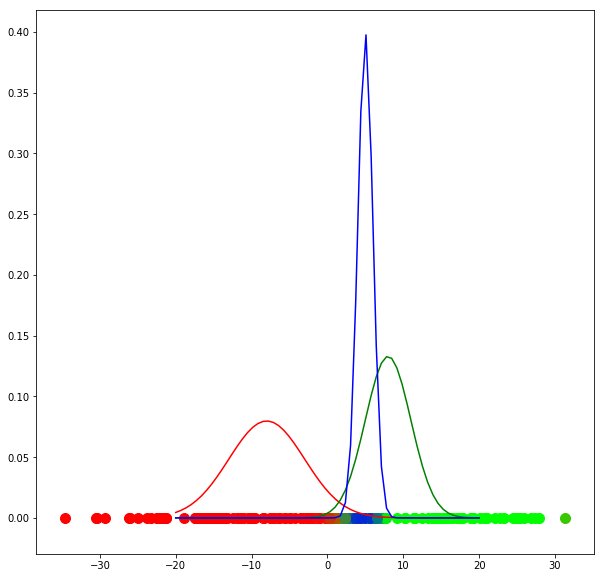

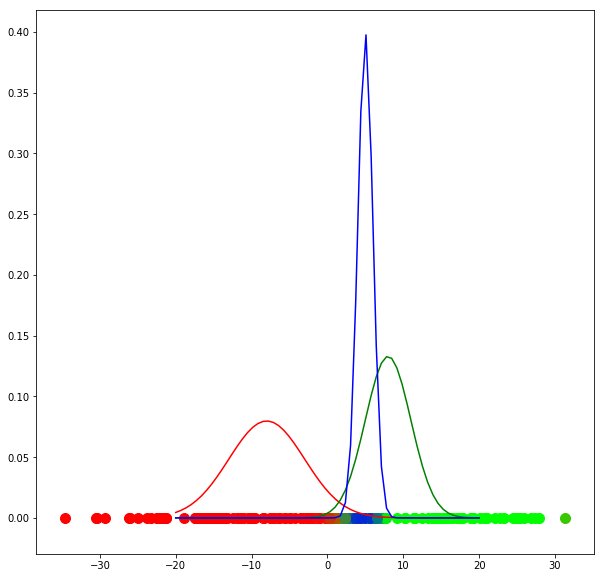

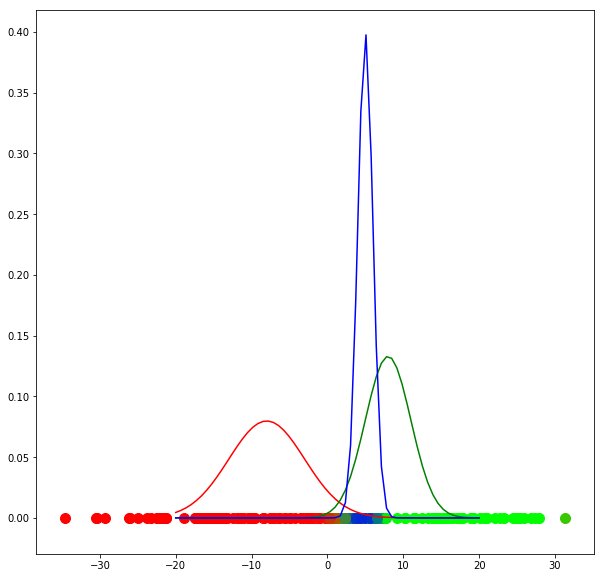

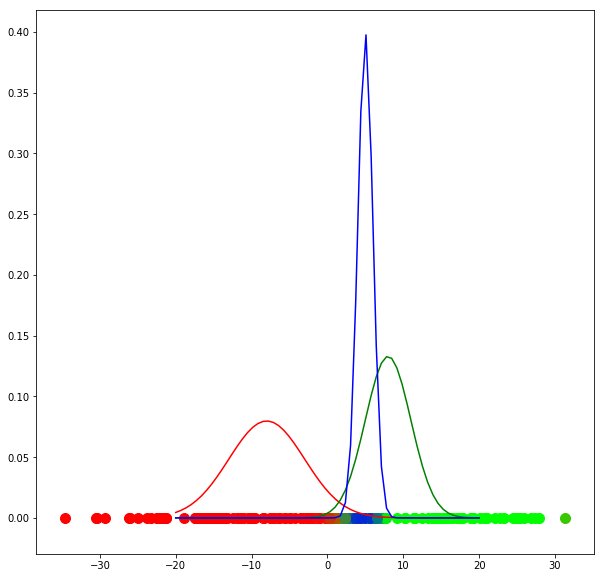

In [7]:

dataset1=load(r'Datasets/Question-2/dataset1.pkl')
dataset2=load(r'Datasets/Question-2/dataset2.pkl')
dataset3=load(r'Datasets/Question-2/dataset3.pkl')

X=[]
for item in dataset1:
    X.append(item)
for item in dataset2:
    X.append(item)
for item in dataset3:
    X.append(item)    

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X, len(X) * [1], c=labels, s=40, cmap='viridis');
plt.show()

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X, len(X) * [1], c=labels, cmap='viridis', s=size);
plt.show()
# print the converged log-likelihood value 
print(gmm.lower_bound_) 

# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)

iterations=8
initmean = [-8,8,5]
initprob = [1/3,1/3,1/3]
initvariance = [5,3,1]

X=np.array(X)
flat_list = [item for sublist in X for item in sublist]
flat_list=np.array(flat_list)

gmm1 = GMM1D(flat_list,iterations,initmean,initprob,initvariance)
gmm1.run()